#### 펭귄 데이터 다중 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: C:\workspace\flyai\ML\penguins.csv

  0%|          | 0.00/2.77k [00:00<?, ?B/s]
13.8kB [00:00, ?B/s]                       


In [3]:
df = pd.read_csv("../data/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df = df.dropna()
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
print(df["species"].unique())
print(df["island"].unique())
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [11]:
df["species"] = df["species"].map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df["island"] = df["island"].map({"Torgersen": 0, "Biscoe": 1, "Dream": 2})
df["sex"] = df["sex"].map({"MALE": 0, "FEMALE": 1})
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


In [12]:
x_data = df.drop("species", axis=1)
y_data = df["species"]

print(x_data, "\n\n")
print(y_data)

     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         0            39.1           18.7              181.0       3750.0   
1         0            39.5           17.4              186.0       3800.0   
2         0            40.3           18.0              195.0       3250.0   
4         0            36.7           19.3              193.0       3450.0   
5         0            39.3           20.6              190.0       3650.0   
..      ...             ...            ...                ...          ...   
338       1            47.2           13.7              214.0       4925.0   
340       1            46.8           14.3              215.0       4850.0   
341       1            50.4           15.7              222.0       5750.0   
342       1            45.2           14.8              212.0       5200.0   
343       1            49.9           16.1              213.0       5400.0   

     sex  
0      0  
1      1  
2      1  
4      1  
5      0

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(266, 6) (67, 6)
(266,) (67,)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)   # 평균과 표준편차를 계산
x_train = scaler.transform(x_train)   # 평균과 표준편차를 이용해 표준화
y_train = y_train.values
x_test = scaler.transform(x_test)
y_test = y_test.values

In [17]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_train, y_train))

In [18]:
scores

[1.0,
 1.0,
 0.9924812030075187,
 0.9962406015037594,
 0.9887218045112782,
 0.9962406015037594,
 0.9924812030075187,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9962406015037594,
 0.9924812030075187,
 0.9962406015037594,
 0.9924812030075187]

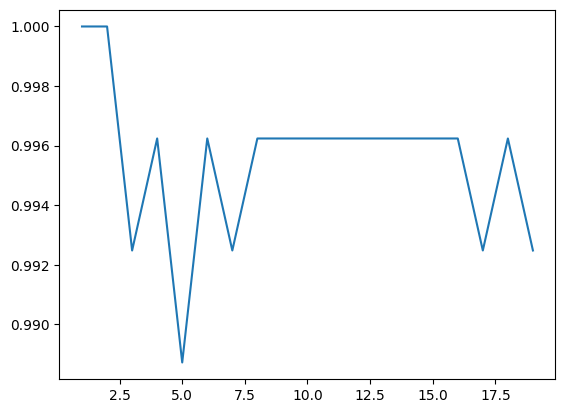

In [19]:
plt.plot(np.arange(1, 20), scores)

In [22]:
from sklearn.metrics import accuracy_score   # 정확도
from sklearn.metrics import precision_score   # 정밀도
from sklearn.metrics import recall_score   # 재현율

def print_score(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    print("accuracy :", acc)
    print("precision :", pre)
    print("recall :", rec)

In [23]:
y_pred = clf.predict(x_test)
print_score(y_test, y_pred)

accuracy : 1.0
precision : 1.0
recall : 1.0
